### Implement ATR and Risk management

In [1]:
from pathlib import Path
from freqtrade.configuration import Configuration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#from scipy.optimiWWze import brute

path='user_data/configs/'

config = Configuration.from_files([path + "config_binance_zone.json"])

data_location = Path(config['user_data_dir'], 'data', 'binance')

pair = "BNB_USDT"


In [2]:
config["timeframe"] = '4h'

In [3]:
# Load data using values set above
from freqtrade.data.history import load_pair_history

dataFrame = load_pair_history(datadir=data_location,
                            timeframe=config["timeframe"],
                            pair=pair)

# Confirm success
print("Loaded " + str(len(dataFrame)) + f" rows of data for {pair} from {data_location}")
dataFrame.head()

Loaded 8984 rows of data for BNB_USDT from /freqtrade/user_data/data/binance


,date,open,high,low,close,volume
0,2017-11-06 00:00:00+00:00,1.5000,1.7990,0.5000,1.7000,649.12
1,2017-11-06 04:00:00+00:00,1.3000,1.6810,1.3000,1.6250,52482.55
2,2017-11-06 08:00:00+00:00,1.6011,1.6760,1.5800,1.6288,21742.42
3,2017-11-06 12:00:00+00:00,1.6288,1.6288,1.5645,1.6148,22186.53
4,2017-11-06 16:00:00+00:00,1.6148,1.6310,1.5645,1.5868,11769.81


In [4]:
dataFrame.head()

,date,open,high,low,close,volume
0,2017-11-06 00:00:00+00:00,1.5000,1.7990,0.5000,1.7000,649.12
1,2017-11-06 04:00:00+00:00,1.3000,1.6810,1.3000,1.6250,52482.55
2,2017-11-06 08:00:00+00:00,1.6011,1.6760,1.5800,1.6288,21742.42
3,2017-11-06 12:00:00+00:00,1.6288,1.6288,1.5645,1.6148,22186.53
4,2017-11-06 16:00:00+00:00,1.6148,1.6310,1.5645,1.5868,11769.81


In [5]:
dataFrame.sort_values(by='date',ascending = False)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8984 entries, 0 to 8983
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    8984 non-null   datetime64[ns, UTC]
 1   open    8984 non-null   float64            
 2   high    8984 non-null   float64            
 3   low     8984 non-null   float64            
 4   close   8984 non-null   float64            
 5   volume  8984 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 421.2 KB


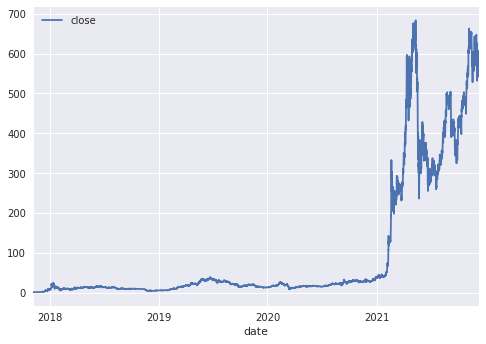

In [6]:
dataFrame.plot('date',['close'])
plt.show()


In [7]:
date_data = dataFrame.set_index('date', drop=False)
data_between = date_data['2018-01-01':'2019-01-01']
data_between

,date,open,high,low,close,volume
date,,,,,,
2018-01-01 00:00:00+00:00,2018-01-01 00:00:00+00:00,8.5478,8.5478,8.1305,8.3401,136343.94
2018-01-01 04:00:00+00:00,2018-01-01 04:00:00+00:00,8.3612,8.7000,8.3410,8.3600,100304.70
2018-01-01 08:00:00+00:00,2018-01-01 08:00:00+00:00,8.3852,8.5300,8.0703,8.1599,113605.91
2018-01-01 12:00:00+00:00,2018-01-01 12:00:00+00:00,8.1800,8.3300,7.8000,8.1101,156761.84
2018-01-01 16:00:00+00:00,2018-01-01 16:00:00+00:00,8.1160,8.1778,7.9592,8.1150,61915.82
...,...,...,...,...,...,...
2019-01-01 04:00:00+00:00,2019-01-01 04:00:00+00:00,5.8601,5.9707,5.8500,5.9531,220362.64
2019-01-01 08:00:00+00:00,2019-01-01 08:00:00+00:00,5.9517,5.9790,5.8808,5.9592,245523.42
2019-01-01 12:00:00+00:00,2019-01-01 12:00:00+00:00,5.9602,5.9793,5.8000,5.8307,184748.05


<AxesSubplot:xlabel='date'>

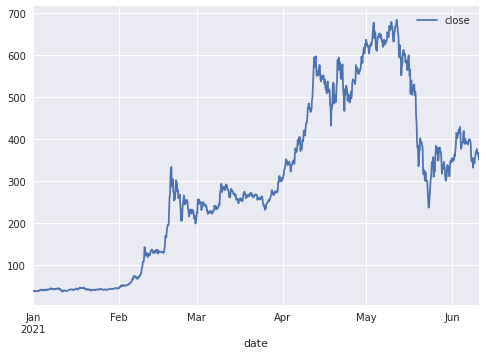

In [8]:
data = dataFrame.set_index('date', drop=False)
data_red = data['2021-01-01':'2021-06-10']
data_red.plot('date',['close'])

In [9]:
dataFrame

,date,open,high,low,close,volume
0,2017-11-06 00:00:00+00:00,1.5000,1.7990,0.5000,1.7000,649.120
1,2017-11-06 04:00:00+00:00,1.3000,1.6810,1.3000,1.6250,52482.550
2,2017-11-06 08:00:00+00:00,1.6011,1.6760,1.5800,1.6288,21742.420
3,2017-11-06 12:00:00+00:00,1.6288,1.6288,1.5645,1.6148,22186.530
4,2017-11-06 16:00:00+00:00,1.6148,1.6310,1.5645,1.5868,11769.810
...,...,...,...,...,...,...
8979,2021-12-11 12:00:00+00:00,551.2000,560.0000,549.7000,559.7000,120038.655
8980,2021-12-11 16:00:00+00:00,559.8000,567.0000,557.0000,557.7000,112331.042
8981,2021-12-11 20:00:00+00:00,557.6000,566.2000,554.2000,564.5000,89561.649
8982,2021-12-12 00:00:00+00:00,564.6000,567.0000,559.3000,561.8000,75526.696


In [10]:
### Strategy

In [11]:
dataFrame = dataFrame.set_index('date', drop=False)
dataFrame = dataFrame.sort_index()
dataFrame

,date,open,high,low,close,volume
date,,,,,,
2017-11-06 00:00:00+00:00,2017-11-06 00:00:00+00:00,1.5000,1.7990,0.5000,1.7000,649.120
2017-11-06 04:00:00+00:00,2017-11-06 04:00:00+00:00,1.3000,1.6810,1.3000,1.6250,52482.550
2017-11-06 08:00:00+00:00,2017-11-06 08:00:00+00:00,1.6011,1.6760,1.5800,1.6288,21742.420
2017-11-06 12:00:00+00:00,2017-11-06 12:00:00+00:00,1.6288,1.6288,1.5645,1.6148,22186.530
2017-11-06 16:00:00+00:00,2017-11-06 16:00:00+00:00,1.6148,1.6310,1.5645,1.5868,11769.810
...,...,...,...,...,...,...
2021-12-11 12:00:00+00:00,2021-12-11 12:00:00+00:00,551.2000,560.0000,549.7000,559.7000,120038.655
2021-12-11 16:00:00+00:00,2021-12-11 16:00:00+00:00,559.8000,567.0000,557.0000,557.7000,112331.042
2021-12-11 20:00:00+00:00,2021-12-11 20:00:00+00:00,557.6000,566.2000,554.2000,564.5000,89561.649


In [12]:
# Add your lib to import here
import talib.abstract as ta
import freqtrade.vendor.qtpylib.indicators as qtpylib
import math

emaFast = 6
emaSlow = 18
rsiPeriod = 14
overBought = 80
overSold = 30

# Fast Trail 
atrFast = 6
atrFM = 0.5 # fast ATR multiplier

# Slow Trail 
atrSlow = 18 # Slow ATR perod
atrSM = 2 # Slow ATR multiplier
# real = ATR(high, low, close, timeperiod=14)

dataFrame['ohlc4'] = (dataFrame['open'] + dataFrame['high'] + dataFrame['low'] + dataFrame['close']) / 4
dataFrame['ema_fast'] = ta.EMA(dataFrame, timeperiod=emaFast)
dataFrame['ema_slow'] = ta.EMA(dataFrame, timeperiod=emaSlow)
dataFrame['rsi'] = ta.RSI(dataFrame, timeperiod=rsiPeriod)
dataFrame['macd'] = dataFrame['ema_fast'] - dataFrame['ema_slow']
dataFrame['bullish'] = dataFrame['macd'] > 0
dataFrame['bearish'] = dataFrame['macd'] < 0

dataFrame.dropna(inplace=True)
dataFrame

,date,open,high,low,close,volume,ohlc4,ema_fast,ema_slow,rsi,macd,bullish,bearish
date,,,,,,,,,,,,,
2017-11-08 20:00:00+00:00,2017-11-08 20:00:00+00:00,1.9100,1.9900,1.8750,1.9889,110289.100,1.940975,1.905487,1.736222,72.902158,0.169265,True,False
2017-11-09 00:00:00+00:00,2017-11-09 00:00:00+00:00,1.9781,2.0500,1.9000,2.0500,44788.840,1.994525,1.946776,1.769251,75.869469,0.177525,True,False
2017-11-09 04:00:00+00:00,2017-11-09 04:00:00+00:00,1.9600,2.0295,1.9600,2.0182,14802.420,1.991925,1.967183,1.795457,71.482175,0.171727,True,False
2017-11-09 08:00:00+00:00,2017-11-09 08:00:00+00:00,2.0182,2.0700,1.9704,2.0001,71318.930,2.014675,1.976588,1.816998,69.035162,0.159590,True,False
2017-11-09 12:00:00+00:00,2017-11-09 12:00:00+00:00,2.0599,2.1997,2.0118,2.0711,88775.930,2.085625,2.003591,1.843746,72.947295,0.159846,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-11 12:00:00+00:00,2021-12-11 12:00:00+00:00,551.2000,560.0000,549.7000,559.7000,120038.655,555.150000,558.403231,568.634329,44.646770,-10.231098,False,True
2021-12-11 16:00:00+00:00,2021-12-11 16:00:00+00:00,559.8000,567.0000,557.0000,557.7000,112331.042,560.375000,558.202308,567.483347,43.897676,-9.281039,False,True
2021-12-11 20:00:00+00:00,2021-12-11 20:00:00+00:00,557.6000,566.2000,554.2000,564.5000,89561.649,560.625000,560.001649,567.169311,47.144792,-7.167662,False,True


In [13]:


dataFrame['sl1'] = atrFM*ta.ATR(dataFrame.high, dataFrame.low, dataFrame.close,timeperiod=atrFast)  # Stop Loss
dataFrame['sl2'] = atrSM*ta.ATR(dataFrame.high, dataFrame.low, dataFrame.close,timeperiod=atrSlow) 
# Trail2 = iff(SC>nz(Trail2[1],0) and SC[1]>nz(Trail2[1],0),max(nz(Trail2[1],0),SC-SL2),iff(SC<nz(Trail2[1],0) and SC[1]<nz(Trail2[1],0),min(nz(Trail2[1],0),SC+SL2),iff(SC>nz(Trail2[1],0),SC-SL2,SC+SL2)))
# dataFrame['Trail2'] = if dataFrame.Trail2[-1]/dataFrame.SL1

#dataFrame.dropna(inplace=True)
#dataFrame.dropna(inplace=true)
#data = dataFrame.set_index('date', drop=False)
#data_red = data['2021-01-01':'2021-06-10']
#data_red
# test
# dataFrame['trail2'] = dataFrame.iloc[-1].trail2 + dataFrame.iloc[-1].sl2
dataFrame.dropna(inplace=True)
# dataFrame.head()

In [14]:
index = 0
dataFrame.iloc[index].close
#dataFrame.iloc[index].close > max(dataFrame.iloc[index - 1].trail2, dataFrame.iloc[index].close - dataFrame.iloc[index].sl2)
dataFrame.iloc[index].date
dataFrame.iloc[index].close 
dataFrame_between01 = dataFrame['2019-06-26':'2019-06-27']
dataFrame_between01

,date,open,high,low,close,volume,ohlc4,ema_fast,ema_slow,rsi,macd,bullish,bearish,sl1,sl2
date,,,,,,,,,,,,,,,
2019-06-26 00:00:00+00:00,2019-06-26 00:00:00+00:00,36.0941,36.6581,35.9591,36.3728,362475.93,36.271025,36.498192,36.927588,43.753493,-0.429396,False,True,0.354263,1.563043
2019-06-26 04:00:00+00:00,2019-06-26 04:00:00+00:00,36.3727,37.7900,36.2201,37.4549,567246.01,36.959425,36.771537,36.983094,54.966447,-0.211557,False,True,0.426044,1.650640
2019-06-26 08:00:00+00:00,2019-06-26 08:00:00+00:00,37.4698,37.9926,37.0608,37.4284,368493.40,37.487900,36.959212,37.029968,54.678967,-0.070756,False,True,0.432687,1.662471
2019-06-26 12:00:00+00:00,2019-06-26 12:00:00+00:00,37.4319,38.0000,36.8210,37.0994,387521.15,37.338075,36.999266,37.037277,51.105324,-0.038011,False,True,0.458822,1.701112
2019-06-26 16:00:00+00:00,2019-06-26 16:00:00+00:00,37.0994,37.2203,35.8500,36.0882,507471.13,36.564475,36.738961,36.937374,42.016004,-0.198413,False,True,0.496543,1.758861
2019-06-26 20:00:00+00:00,2019-06-26 20:00:00+00:00,36.0618,36.4070,34.5000,36.1189,664211.18,35.771925,36.561801,36.851219,42.351232,-0.289418,False,True,0.572703,1.873035
2019-06-27 00:00:00+00:00,2019-06-27 00:00:00+00:00,36.1185,36.3249,34.2801,35.3163,461290.52,35.509950,36.205943,36.689649,36.422658,-0.483705,False,True,0.647652,1.996178
2019-06-27 04:00:00+00:00,2019-06-27 04:00:00+00:00,35.3170,35.7276,34.3500,34.9726,345219.20,35.091800,35.853560,36.508907,34.213883,-0.655347,False,True,0.654510,2.038346
2019-06-27 08:00:00+00:00,2019-06-27 08:00:00+00:00,34.9726,35.0327,33.1584,34.1954,519922.50,34.339775,35.379800,36.265380,29.811376,-0.885580,False,True,0.701617,2.133360


In [15]:
dataFrame['red'] = False
dataFrame['brown'] = False
dataFrame['yellow'] = False
dataFrame['blue'] = False
dataFrame['green'] = False
dataFrame['long'] = False
dataFrame['preBuy'] = False
dataFrame['short'] = False
dataFrame['preSell'] = False
dataFrame['trail2'] = 0.0

"""
Buy = bullish and bearish[1]
PreBuy = Blue and Blue[1] and Blue[2] and Blue[3] and mainSource<mainSource[2]
BuyMore = barssince(bullish)<26 and Yellow and mainSource==lowest(mainSource,9)
Sell = bearish and bullish[1]
PreSell = Yellow and barssince(Buy)>25 and mainSource<mainSource[2]
SellMore = Yellow and barssince(Yellow)>2 and mainSource<mainSource[2]
"""

for index in range(len(dataFrame)):
    # Green = bullish and mainSource>fast
    dataFrame.green.iloc[index] = dataFrame.bullish.iloc[index] and (dataFrame.ohlc4.iloc[index] > dataFrame.ema_fast.iloc[index])
    # Blue = bearish and mainSource>fast and mainSource>slow
    dataFrame.blue.iloc[index] = dataFrame.bearish.iloc[index] and dataFrame.ohlc4.iloc[index] > dataFrame.ema_fast.iloc[index]
    # Yellow = bullish and mainSource<fast and mainSource>slow
    dataFrame.yellow.iloc[index] = dataFrame.bullish.iloc[index] and dataFrame.ohlc4.iloc[index] < dataFrame.ema_slow.iloc[index]
    # Brown = bullish and mainSource<fast and mainSource<slow
    dataFrame.brown.iloc[index] = dataFrame.bullish.iloc[index] and dataFrame.ohlc4.iloc[index] < dataFrame.ema_fast.iloc[index] and dataFrame.ohlc4.iloc[index] < dataFrame.ema_slow.iloc[index]
    # Red = bearish and mainSource<fast
    dataFrame.red.iloc[index] = dataFrame.bearish.iloc[index] and dataFrame.ohlc4.iloc[index] < dataFrame.ema_fast.iloc[index]
    # iff(SC>nz(Trail2[1],0)                                    and SC[1]>nz(Trail2[1],0)
    if dataFrame.close.iloc[index] > dataFrame.trail2.iloc[index - 1] and dataFrame.close.iloc[index - 1] > dataFrame.trail2.iloc[index - 1]:
        dataFrame.trail2.iloc[index] = max(dataFrame.trail2.iloc[index - 1], dataFrame.close.iloc[index] - dataFrame.sl2.iloc[index])
    # iff(SC<nz(Trail2[1],0)                                        and SC[1]<nz(Trail2[1],0)
    elif dataFrame.close.iloc[index] < dataFrame.trail2.iloc[index - 1] and dataFrame.close.iloc[index - 1] < dataFrame.trail2.iloc[index - 1]: 
        dataFrame.trail2.iloc[index] = min(dataFrame.trail2.iloc[index - 1], dataFrame.close.iloc[index - 1] +  dataFrame.sl2.iloc[index - 1])
    # iff(SC>nz(Trail2[1],0),    
    elif dataFrame.close.iloc[index] > dataFrame.trail2.iloc[index - 1]:
        dataFrame.trail2.iloc[index] = dataFrame.close.iloc[index] - dataFrame.sl2.iloc[index]
    else:
        dataFrame.trail2.iloc[index] = dataFrame.close.iloc[index] + dataFrame.sl2.iloc[index]
    # it can use rolling
    dataFrame.long.iloc[index] = dataFrame.bullish.iloc[index] and dataFrame.bullish.iloc[index - 1]
    dataFrame.preBuy.iloc[index] = dataFrame.bullish.iloc[index] and dataFrame.bullish.iloc[index - 1]

    # dataFrame.preSell.iloc[index] =  dataFrame.yellow.iloc[index] and ta.
    dataFrame.short.iloc[index] = dataFrame.bearish.iloc[index] and dataFrame.bearish.iloc[index - 1]

# greenLine = SC>Trail2
dataFrame['greenLine'] = False
dataFrame.loc[
        (
            (dataFrame["close"] > dataFrame['trail2'])
        ),
        'greenLine'] = True
dataFrame['greenLine_last'] = dataFrame.greenLine.shift(1)

dataFrame['short_last'] = dataFrame.short.shift(1)
dataFrame['green_last'] = dataFrame.green.shift(1)
dataFrame['red_last'] = dataFrame.red.shift(1)
dataFrame['hold_state'] = False
dataFrame.dropna(inplace=True)
dataFrame

/home/ftuser/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,date,open,high,low,close,volume,ohlc4,ema_fast,ema_slow,rsi,...,preBuy,short,preSell,trail2,greenLine,greenLine_last,short_last,green_last,red_last,hold_state
date,,,,,,,,,,,,,,,,,,,,,
2017-11-12 00:00:00+00:00,2017-11-12 00:00:00+00:00,1.6567,1.6567,1.5000,1.5300,106506.670,1.585850,1.656897,1.752543,37.210004,...,False,True,False,1.349844,True,True,True,False,True,False
2017-11-12 04:00:00+00:00,2017-11-12 04:00:00+00:00,1.5100,1.6200,1.3400,1.5302,185149.270,1.500050,1.620698,1.729138,37.223032,...,False,True,False,1.349844,True,True,True,False,True,False
2017-11-12 08:00:00+00:00,2017-11-12 08:00:00+00:00,1.5676,1.7000,1.5100,1.5851,51113.990,1.590675,1.610527,1.713976,40.851015,...,False,True,False,1.349844,True,True,True,False,True,False
2017-11-12 12:00:00+00:00,2017-11-12 12:00:00+00:00,1.6003,1.6792,1.5313,1.5750,65510.920,1.596450,1.600376,1.699347,40.388573,...,False,True,False,1.349844,True,True,True,False,True,False
2017-11-12 16:00:00+00:00,2017-11-12 16:00:00+00:00,1.5750,1.6389,1.5058,1.5879,29029.660,1.576900,1.596812,1.687616,41.302532,...,False,True,False,1.349844,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-11 12:00:00+00:00,2021-12-11 12:00:00+00:00,551.2000,560.0000,549.7000,559.7000,120038.655,555.150000,558.403231,568.634329,44.646770,...,False,True,False,580.683682,False,False,True,False,True,False
2021-12-11 16:00:00+00:00,2021-12-11 16:00:00+00:00,559.8000,567.0000,557.0000,557.7000,112331.042,560.375000,558.202308,567.483347,43.897676,...,False,True,False,580.683682,False,False,True,False,True,False
2021-12-11 20:00:00+00:00,2021-12-11 20:00:00+00:00,557.6000,566.2000,554.2000,564.5000,89561.649,560.625000,560.001649,567.169311,47.144792,...,False,True,False,580.683682,False,False,True,False,False,False


In [16]:

dataFrame['hold_state'].shift(1) == False & (dataFrame['greenLine_last'] == False | (dataFrame['greenLine_last'] & dataFrame['greenLine'])) & (dataFrame['long'] | dataFrame['green'] & dataFrame['greenLine']) | (dataFrame['blue'] & dataFrame['greenLine'])

date
2017-11-12 00:00:00+00:00    False
2017-11-12 04:00:00+00:00     True
2017-11-12 08:00:00+00:00     True
2017-11-12 12:00:00+00:00     True
2017-11-12 16:00:00+00:00     True
                             ...  
2021-12-11 12:00:00+00:00     True
2021-12-11 16:00:00+00:00     True
2021-12-11 20:00:00+00:00     True
2021-12-12 00:00:00+00:00     True
2021-12-12 04:00:00+00:00     True
Length: 8948, dtype: bool

In [17]:
dataFrame['signal_buy'] = False
dataFrame['signal_sell'] = False
dataFrame['on_buy'] = 0

dataFrame.loc[(
    (dataFrame['green_last'] == False) & (dataFrame['green'] == True) # Green buy
    | ((dataFrame['greenLine'] == True) & (dataFrame['blue'] == True)) # Over ATR and blue
), 'signal_buy'] = True

dataFrame.loc[(
    ((dataFrame['red_last'] == False) & (dataFrame['red'] == True)) # Red Sell
    | ((dataFrame['greenLine_last'] == True) & (dataFrame['greenLine'] == False)) # Stop lost
), 'signal_sell'] = True

dataFrame.loc[(
   (dataFrame['signal_buy'] == True)
), 'on_buy'] = 1



In [18]:
dataFrame.loc[(dataFrame['signal_buy'] == True) , 'buy'] = 1
dataFrame.loc[(dataFrame['signal_sell'] == True), 'sell'] = 1

In [37]:
# dataFrame_between = dataFrame['2020-01-26':'2020-02-10']
dataFrame_between = dataFrame['2021-01-01':'2021-06-30']
dataFrame_between.loc[:,['ohlc4','ema_fast','macd','bullish','bearish','green','signal_buy','signal_sell','blue','yellow','brown','red_last','red','greenLine_last','greenLine','buy','on_buy','sell']]

,ohlc4,ema_fast,macd,bullish,bearish,green,signal_buy,signal_sell,blue,yellow,brown,red_last,red,greenLine_last,greenLine,buy,on_buy,sell
date,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,37.587050,37.555607,0.275812,True,False,True,True,False,False,False,False,False,False,True,True,1.0,1,NaN
2021-01-01 04:00:00+00:00,37.764950,37.591490,0.269443,True,False,True,False,False,False,False,False,False,False,True,True,NaN,0,NaN
2021-01-01 08:00:00+00:00,38.094225,37.819750,0.385245,True,False,True,False,False,False,False,False,False,False,True,True,NaN,0,NaN
2021-01-01 12:00:00+00:00,38.321200,37.908907,0.401002,True,False,True,False,False,False,False,False,False,False,True,True,NaN,0,NaN
2021-01-01 16:00:00+00:00,37.706750,37.763505,0.266959,True,False,False,False,False,False,False,False,False,False,True,True,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 04:00:00+00:00,296.820000,300.011831,4.468500,True,False,False,False,False,False,False,False,False,False,True,True,NaN,0,NaN
2021-06-30 08:00:00+00:00,295.995000,298.157022,2.826673,True,False,False,False,False,False,False,False,False,False,True,True,NaN,0,NaN
2021-06-30 12:00:00+00:00,288.220000,293.977873,-0.110334,False,True,False,False,True,False,False,False,False,True,True,False,NaN,0,1.0


In [38]:

from freqtrade.plot.plotting import  generate_candlestick_graph

graph = generate_candlestick_graph(pair=pair,
                                   data=dataFrame_between,
                                   #trades=dataFrame,
                                   indicators1=['ema_fast', 'ema_slow', 'trail2','greenLine'], #,'on_buy'
                                   indicators2=['rsi']
                                  )
graph.show()
# graph.show(renderer="browser")

In [28]:
dataFrame_between01 = dataFrame['2019-06-26':'2019-06-27']
dataFrame_between01.loc[:,['ohlc4','ema_fast','macd','bullish','bearish','green','blue','yellow','brown','red','sl1','sl2','long','preBuy','short','preSell','trail2','greenLine','greenLine_last','short_last','buy','sell']]

,ohlc4,ema_fast,macd,bullish,bearish,green,blue,yellow,brown,red,...,long,preBuy,short,preSell,trail2,greenLine,greenLine_last,short_last,buy,sell
date,,,,,,,,,,,,,,,,,,,,,
2019-06-26 00:00:00+00:00,36.271025,36.498192,-0.429396,False,True,False,False,False,False,True,...,False,False,True,False,37.666851,False,False,True,NaN,NaN
2019-06-26 04:00:00+00:00,36.959425,36.771537,-0.211557,False,True,False,True,False,False,False,...,False,False,True,False,37.666851,False,False,True,NaN,NaN
2019-06-26 08:00:00+00:00,37.487900,36.959212,-0.070756,False,True,False,True,False,False,False,...,False,False,True,False,37.666851,False,False,True,NaN,NaN
2019-06-26 12:00:00+00:00,37.338075,36.999266,-0.038011,False,True,False,True,False,False,False,...,False,False,True,False,37.666851,False,False,True,NaN,NaN
2019-06-26 16:00:00+00:00,36.564475,36.738961,-0.198413,False,True,False,False,False,False,True,...,False,False,True,False,37.666851,False,False,True,NaN,1.0
2019-06-26 20:00:00+00:00,35.771925,36.561801,-0.289418,False,True,False,False,False,False,True,...,False,False,True,False,37.666851,False,False,True,NaN,NaN
2019-06-27 00:00:00+00:00,35.509950,36.205943,-0.483705,False,True,False,False,False,False,True,...,False,False,True,False,37.666851,False,False,True,NaN,NaN
2019-06-27 04:00:00+00:00,35.091800,35.853560,-0.655347,False,True,False,False,False,False,True,...,False,False,True,False,37.312478,False,False,True,NaN,NaN
2019-06-27 08:00:00+00:00,34.339775,35.379800,-0.885580,False,True,False,False,False,False,True,...,False,False,True,False,37.010946,False,False,True,NaN,NaN


In [29]:
a = dataFrame_between01.iloc[0]
a.bullish and a.ohlc4 > a.ema_fast
# dataFrame.loc[dataFrame['green']]
## dataFrame_between01 = dataFrame_between01.assign(green=lambda x: x.bullish & x.ohlc4 > x.ema_fast)
## dataFrame_between01.loc[:,['ohlc4','ema_fast','macd','bullish','bearish','green','blue','yellow','brown','red','sl1','sl2','long','preBuy','short','preSell','trail2','greenLine','greenLine_last','short_last','buy','sell']]

False

In [30]:
dataFrame_between = dataFrame['2019-08-06':'2019-08-11']
dataFrame_between.loc[:,['ohlc4','bearish','ema_fast','green','blue','yellow','brown','red','preSell','greenLine','greenLine_last','short_last','buy','sell']]

,ohlc4,bearish,ema_fast,green,blue,yellow,brown,red,preSell,greenLine,greenLine_last,short_last,buy,sell
date,,,,,,,,,,,,,,
2019-08-06 00:00:00+00:00,27.982275,False,27.940235,True,False,False,False,False,False,True,True,False,1.0,NaN
2019-08-06 04:00:00+00:00,27.931000,False,27.941111,False,False,False,False,False,False,True,True,False,NaN,NaN
2019-08-06 08:00:00+00:00,27.845325,False,27.844050,True,False,False,False,False,False,True,True,False,1.0,NaN
2019-08-06 12:00:00+00:00,27.559200,True,27.777693,False,False,False,False,True,False,True,True,False,NaN,1.0
2019-08-06 16:00:00+00:00,27.617900,True,27.717038,False,False,False,False,True,False,True,True,False,NaN,NaN
2019-08-06 20:00:00+00:00,27.555050,True,27.698541,False,False,False,False,True,False,True,True,True,NaN,NaN
2019-08-07 00:00:00+00:00,27.816025,True,27.764730,False,True,False,False,False,False,True,True,True,1.0,NaN
2019-08-07 04:00:00+00:00,27.660600,True,27.657007,False,True,False,False,False,False,True,True,True,1.0,NaN
2019-08-07 08:00:00+00:00,27.555350,True,27.673662,False,False,False,False,True,False,True,True,True,NaN,1.0


In [31]:
from freqtrade.plot.plotting import  generate_candlestick_graph

graph = generate_candlestick_graph(pair=pair,
                                   data=dataFrame_between,
                                   #trades=dataFrame,
                                   indicators1=['ema_fast', 'ema_slow', 'trail2','greenLine'],
                                   indicators2=['rsi']
                                  )
graph.show()

In [32]:

#trades_red = trades.loc[trades['pair'] == pair]
graph = generate_dataFrametick_graph(pair=pair,
                                   data=dataFrame,
                                   #trades=dataFrame,
                                   indicators1=['ema_fast', 'ema_slow', 'trail2'],
                                   indicators2=['rsi']
                                  )
graph.show(renderer="browser")

NameError: name 'generate_dataFrametick_graph' is not defined